In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.data_preprocessor import get_tourney_data, get_players, get_game_data_as_timeseries
from utils.data_cruncher import get_bid_and_won_stats, get_player_stats
from utils.data_cruncher import get_tri_stats, get_pairwise_stats
from utils.plot_utils import plot_leaderboard_timeseries, plot_performance_timeseries, plot_leaderboard_barplot

### Reading Data

In [2]:
TOURNEY_NUMBER = 7

raw_df = get_tourney_data(TOURNEY_NUMBER)
game_data = get_game_data_as_timeseries(raw_df)
players = get_players(raw_df)

print(f'## 3 of Spades Championship - {TOURNEY_NUMBER}')
print(f'Players participating in this Championship are : {players}')

# raw_df.head()

## 3 of Spades Championship - 7
Players participating in this Championship are : ['Prateek', 'Ani', 'Nats', 'Akash', 'Abhi']


# Part 1 - Crunching player stats

In [3]:
player_stats = get_player_stats(raw_df)

player_stats.to_csv(f'tourney_data/graphs/C{TOURNEY_NUMBER}_player_stats.csv')
# print(player_stats.to_markdown())
player_stats



,Player,Wins,TotalGames,AvgPoints,TotalPoints,WinPercentage
1,Akash,25,37,276.8,10240,67.6
4,Prateek,20,37,218.4,8080,54.1
3,Nats,17,37,191.6,7090,45.9
2,Ani,16,37,177.6,6570,43.2
0,Abhi,12,37,135.1,5000,32.4


See themes below
<!-- wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp -->

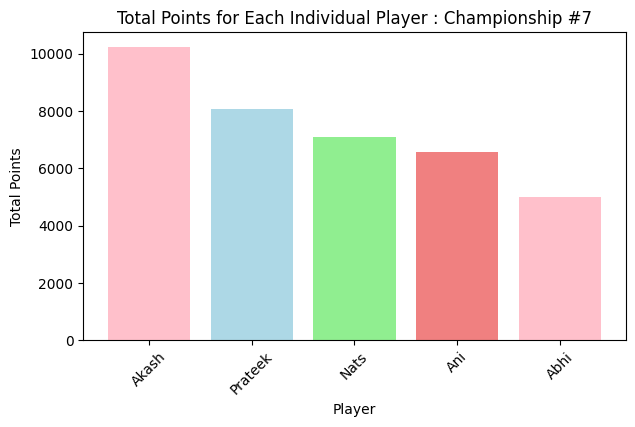

In [4]:
plot_leaderboard_barplot(player_stats, tourney_number=TOURNEY_NUMBER, save_image=True)

# Part 2 - Seeing performance graph over the tournament

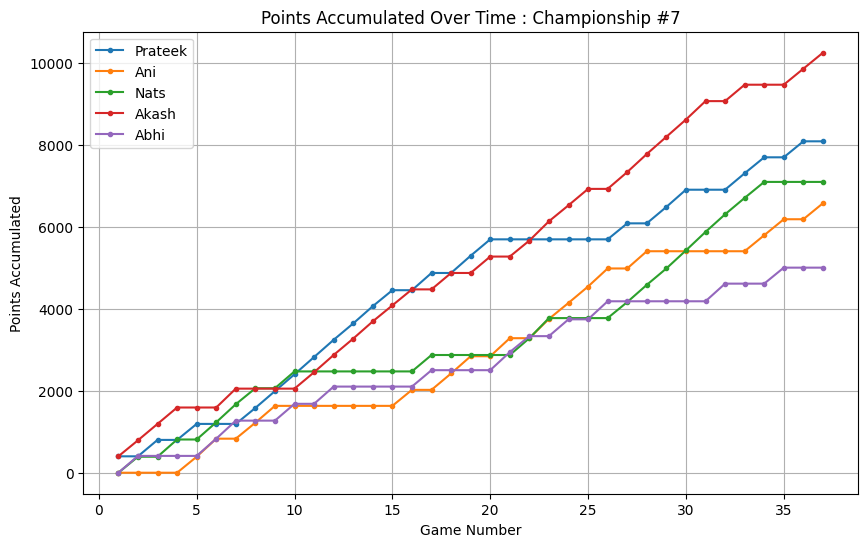

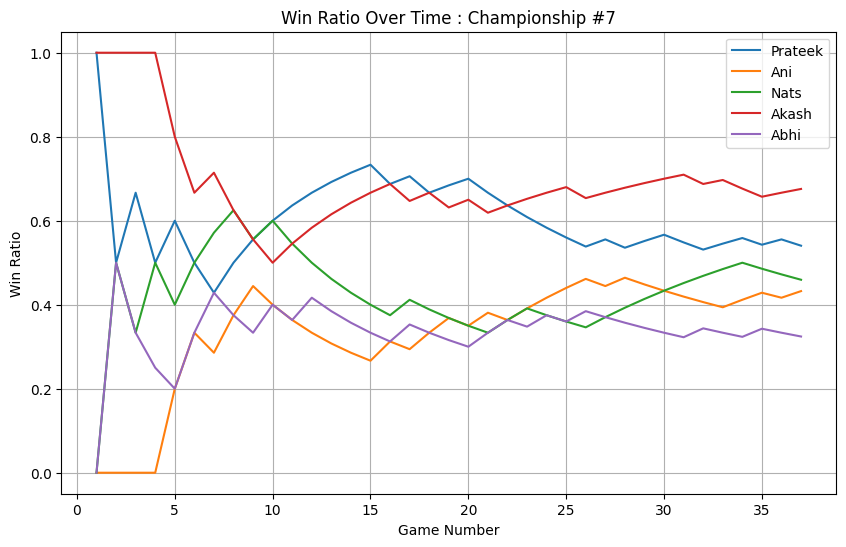

In [5]:
plot_leaderboard_timeseries(game_data, players, tourney_number=TOURNEY_NUMBER, save_image=False)
plot_performance_timeseries(game_data, players, tourney_number=TOURNEY_NUMBER, save_image=False)


# Part 3 - Pair-wise stats

In [6]:
result_pair = get_pairwise_stats(raw_df, min_num_games=10)
result_pair

,Player_x,Player_y,Wins,Losses,TotalGames,AvgPoints,WinPercentage
6,Akash,Prateek,13,5,18,290.6,72.2
4,Akash,Ani,7,3,10,286.0,70.0
5,Akash,Nats,11,6,17,268.8,64.7
0,Abhi,Akash,5,5,10,203.0,50.0
9,Nats,Prateek,8,8,16,200.0,50.0
8,Ani,Prateek,5,6,11,181.8,45.5
7,Ani,Nats,5,9,14,149.3,35.7
2,Abhi,Nats,7,15,22,130.9,31.8
3,Abhi,Prateek,3,8,11,111.8,27.3
1,Abhi,Ani,5,14,19,109.5,26.3


# Part 4 - Trio stats

In [7]:
result_trio = get_tri_stats(raw_df, min_num_games=5)
result_trio

,Player_x,Player_y,Player_z,Wins,Losses,TotalGames,AvgPoints,WinPercentage
8,Akash,Nats,Prateek,4,3,7,230.0,57.1
1,Abhi,Akash,Nats,3,3,6,203.3,50.0
5,Abhi,Nats,Prateek,2,4,6,135.0,33.3
3,Abhi,Ani,Nats,1,8,9,46.7,11.1


# Part 5 - #games bid and won

In [8]:
get_bid_and_won_stats(raw_df)

,Player,Bid and Won
2,Nats,4
3,Akash,4
0,Prateek,2
4,Abhi,2
1,Ani,1
